## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [ ]:
#####

In [5]:
"""
Compile 模型
"""
model = build_mlp()
model.summary()
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.9412 - accuracy: 0.2996 - val_loss: 1.7779 - val_accuracy: 0.3678
Epoch 2/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.7084 - accuracy: 0.3910 - val_loss: 1.6459 - val_accuracy: 0.4129
Epoch 3/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.6137 - accuracy: 0.4227 - val_loss: 1.5853 - val_accuracy: 0.4274
Epoch 4/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5475 - accuracy: 0.4474 - val_loss: 1.5198 - val_accuracy: 0.4609
Epoch 5/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.5084 - accuracy: 0.4612 - val_loss: 1.5103 - val_accuracy: 0.4602
Epoch 6/500
50000/50000 [==============================] - 2s 43us/step - loss: 1.4626 - accuracy: 0.4770 - val_loss: 1.5049 - val_accuracy: 0.4631
Epoch 7/500
50000/50000 [==============================] - 2s 

Epoch 56/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.5686 - accuracy: 0.7958 - val_loss: 1.9272 - val_accuracy: 0.5075
Epoch 57/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.5349 - accuracy: 0.8103 - val_loss: 1.9366 - val_accuracy: 0.5198
Epoch 58/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.5165 - accuracy: 0.8152 - val_loss: 1.9943 - val_accuracy: 0.5066
Epoch 59/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.5373 - accuracy: 0.8082 - val_loss: 2.0864 - val_accuracy: 0.5082
Epoch 60/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.5134 - accuracy: 0.8171 - val_loss: 2.0511 - val_accuracy: 0.5101
Epoch 61/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.5127 - accuracy: 0.8157 - val_loss: 2.1020 - val_accuracy: 0.5127
Epoch 62/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.5115 - accuracy: 0.8149

Epoch 111/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.2974 - accuracy: 0.8918 - val_loss: 3.6885 - val_accuracy: 0.4956
Epoch 112/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.3023 - accuracy: 0.8905 - val_loss: 3.7523 - val_accuracy: 0.4925
Epoch 113/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.2615 - accuracy: 0.9051 - val_loss: 3.7162 - val_accuracy: 0.4987
Epoch 114/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.2294 - accuracy: 0.9178 - val_loss: 3.7816 - val_accuracy: 0.5065
Epoch 115/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.2796 - accuracy: 0.8980 - val_loss: 3.6466 - val_accuracy: 0.4978
Epoch 116/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.2066 - accuracy: 0.9262 - val_loss: 3.7581 - val_accuracy: 0.4990
Epoch 117/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.2290 - accuracy:

50000/50000 [==============================] - 2s 38us/step - loss: 0.2788 - accuracy: 0.9040 - val_loss: 4.9301 - val_accuracy: 0.4911
Epoch 166/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.2081 - accuracy: 0.9276 - val_loss: 4.8893 - val_accuracy: 0.4923
Epoch 167/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.1683 - accuracy: 0.9408 - val_loss: 4.8037 - val_accuracy: 0.4972
Epoch 168/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.1338 - accuracy: 0.9522 - val_loss: 4.9110 - val_accuracy: 0.4977
Epoch 169/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.1381 - accuracy: 0.9514 - val_loss: 5.0380 - val_accuracy: 0.4924
Epoch 170/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.1625 - accuracy: 0.9416 - val_loss: 4.9875 - val_accuracy: 0.4970
Epoch 171/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.1556 - accuracy: 0.9444 - val_

Epoch 220/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.1938 - accuracy: 0.9334 - val_loss: 5.6817 - val_accuracy: 0.4939
Epoch 221/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.1288 - accuracy: 0.9545 - val_loss: 5.8817 - val_accuracy: 0.4975
Epoch 222/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.0948 - accuracy: 0.9662 - val_loss: 6.0527 - val_accuracy: 0.4958
Epoch 223/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.1114 - accuracy: 0.9603 - val_loss: 5.7699 - val_accuracy: 0.5016
Epoch 224/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.1127 - accuracy: 0.9609 - val_loss: 6.0843 - val_accuracy: 0.4910
Epoch 225/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.1548 - accuracy: 0.9474 - val_loss: 5.9550 - val_accuracy: 0.4900
Epoch 226/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.1360 - accuracy:

50000/50000 [==============================] - 2s 38us/step - loss: 0.1072 - accuracy: 0.9636 - val_loss: 6.4335 - val_accuracy: 0.4958
Epoch 275/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.1137 - accuracy: 0.9611 - val_loss: 6.5735 - val_accuracy: 0.4994
Epoch 276/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0525 - accuracy: 0.9821 - val_loss: 6.5029 - val_accuracy: 0.4998
Epoch 277/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0723 - accuracy: 0.9746 - val_loss: 6.5690 - val_accuracy: 0.4953
Epoch 278/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0835 - accuracy: 0.9702 - val_loss: 6.6364 - val_accuracy: 0.4972
Epoch 279/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.2003 - accuracy: 0.9370 - val_loss: 6.7678 - val_accuracy: 0.4923
Epoch 280/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.2132 - accuracy: 0.9332 - val_

Epoch 329/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0491 - accuracy: 0.9833 - val_loss: 7.4142 - val_accuracy: 0.4848
Epoch 330/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.4767 - accuracy: 0.8804 - val_loss: 6.5575 - val_accuracy: 0.4844
Epoch 331/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.1796 - accuracy: 0.9434 - val_loss: 6.5509 - val_accuracy: 0.4980
Epoch 332/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.0713 - accuracy: 0.9762 - val_loss: 6.5176 - val_accuracy: 0.4999
Epoch 333/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 6.6948 - val_accuracy: 0.4993
Epoch 334/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 6.7955 - val_accuracy: 0.4971
Epoch 335/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0383 - accuracy:

50000/50000 [==============================] - 2s 40us/step - loss: 0.1204 - accuracy: 0.9598 - val_loss: 7.4829 - val_accuracy: 0.4937
Epoch 384/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.1153 - accuracy: 0.9624 - val_loss: 7.1457 - val_accuracy: 0.4874
Epoch 385/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.1005 - accuracy: 0.9675 - val_loss: 7.3618 - val_accuracy: 0.4932
Epoch 386/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0738 - accuracy: 0.9755 - val_loss: 7.4112 - val_accuracy: 0.4923
Epoch 387/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 7.3491 - val_accuracy: 0.4923
Epoch 388/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0234 - accuracy: 0.9925 - val_loss: 7.2491 - val_accuracy: 0.5046
Epoch 389/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0448 - accuracy: 0.9849 - val_

Epoch 438/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 8.0771 - val_accuracy: 0.5008
Epoch 439/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 7.9581 - val_accuracy: 0.5021
Epoch 440/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 8.0908 - val_accuracy: 0.5058
Epoch 441/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 8.1205 - val_accuracy: 0.4981
Epoch 442/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.6850 - accuracy: 0.8654 - val_loss: 6.6187 - val_accuracy: 0.4843
Epoch 443/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.1852 - accuracy: 0.9446 - val_loss: 7.0067 - val_accuracy: 0.4939
Epoch 444/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0645 - accuracy:

50000/50000 [==============================] - 2s 38us/step - loss: 0.3030 - accuracy: 0.9024 - val_loss: 5.0375 - val_accuracy: 0.5003
Epoch 493/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0610 - accuracy: 0.9815 - val_loss: 5.3789 - val_accuracy: 0.5052
Epoch 494/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0241 - accuracy: 0.9953 - val_loss: 5.5909 - val_accuracy: 0.4988
Epoch 495/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0135 - accuracy: 0.9983 - val_loss: 5.7812 - val_accuracy: 0.5064
Epoch 496/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0098 - accuracy: 0.9992 - val_loss: 5.9605 - val_accuracy: 0.5056
Epoch 497/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0061 - accuracy: 0.9998 - val_loss: 6.0427 - val_accuracy: 0.5094
Epoch 498/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0047 - accuracy: 0.9999 - val_

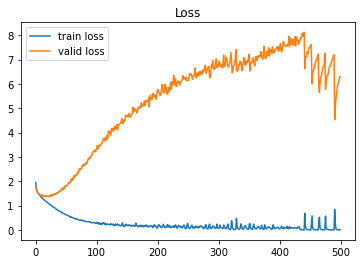

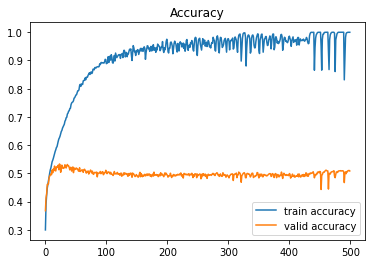

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
#####

In [5]:
model = build_mlp()
model.summary()
optimizer = keras.optimizers.SGD()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 40us/step - loss: 2.0850 - accuracy: 0.2613 - val_loss: 1.9677 - val_accuracy: 0.2974
Epoch 2/100
50000/50000 [==============================] - 2s 33us/step - loss: 1.8878 - accuracy: 0.3353 - val_loss: 1.8634 - val_accuracy: 0.3462
Epoch 3/100
50000/50000 [==============================] - 2s 33us/step - loss: 1.8136 - accuracy: 0.3630 - val_loss: 1.8563 - val_accuracy: 0.3322
Epoch 4/100
50000/50000 [==============================] - 2s 33us/step - loss: 1.7632 - accuracy: 0.3798 - val_loss: 1.7620 - val_accuracy: 0.3670
Epoch 5/100
50000/50000 [==============================] - 2s 33us/step - loss: 1.7235 - accuracy: 0.3946 - val_loss: 1.7575 - val_accuracy: 0.3680
Epoch 6/100
50000/50000 [==============================] - 2s 33us/step - loss: 1.6915 - accuracy: 0.4062 - val_loss: 1.7758 - val_accuracy: 0.3783
Epoch 7/100
50000/50000 [==============================] - 2s 

Epoch 56/100
50000/50000 [==============================] - 2s 32us/step - loss: 1.1833 - accuracy: 0.5841 - val_loss: 1.3628 - val_accuracy: 0.5189
Epoch 57/100
50000/50000 [==============================] - 2s 32us/step - loss: 1.1734 - accuracy: 0.5902 - val_loss: 1.6258 - val_accuracy: 0.4423
Epoch 58/100
50000/50000 [==============================] - 2s 32us/step - loss: 1.1740 - accuracy: 0.5887 - val_loss: 1.4418 - val_accuracy: 0.4906
Epoch 59/100
50000/50000 [==============================] - 2s 32us/step - loss: 1.1647 - accuracy: 0.5936 - val_loss: 1.5698 - val_accuracy: 0.4508
Epoch 60/100
50000/50000 [==============================] - 2s 32us/step - loss: 1.1592 - accuracy: 0.5916 - val_loss: 1.5333 - val_accuracy: 0.4631
Epoch 61/100
50000/50000 [==============================] - 2s 33us/step - loss: 1.1514 - accuracy: 0.5959 - val_loss: 1.4630 - val_accuracy: 0.4830
Epoch 62/100
50000/50000 [==============================] - 2s 33us/step - loss: 1.1481 - accuracy: 0.5971

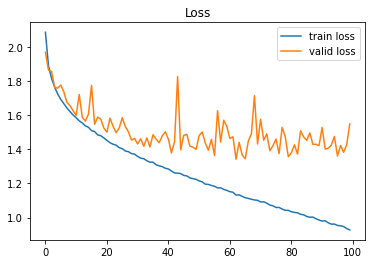

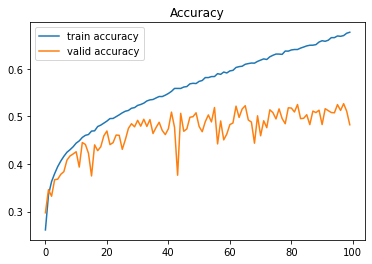

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()